### importação das bibliotecas e pacotes

In [1]:
# Importação das bibliotecas necessárias

import pandas as pd # manipulação de dado em formato de dataframe
import numpy as np # biblioteca para operações matemáticas multidimensionais
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados

# biblioteca de modelagem estatística
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from scipy import stats
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

import os 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

#### importando a base de dados (orçamentos até 12/2022)

In [2]:
# Importando a base de dados no formato xlsx
data = pd.read_excel("df_bwx_inicial.xlsx")
print(data.shape)

(50816, 9)


#### importando a base de dados (orçamentos a partir de 01/01/2023)

In [7]:
data2023 = pd.read_excel("df_bwx_2023.xlsx")
print(data2023.shape)

(188, 9)


#### verificação inicial do banco de dados

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50816 entries, 0 to 50815
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idQuote       50815 non-null  object 
 1   idCurrency    50816 non-null  object 
 2   idSource      50816 non-null  object 
 3   idTarget      50816 non-null  object 
 4   creationDate  50816 non-null  int64  
 5   status        50816 non-null  object 
 6   totalCost     50816 non-null  float64
 7   idClient      50816 non-null  object 
 8   idCreator     50816 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.5+ MB


In [4]:
data.head()

,idQuote,idCurrency,idSource,idTarget,creationDate,status,totalCost,idClient,idCreator
0,B-22273-81211,USD,LS1,LT1,1664577211063,APPROVED,3.21300,CLI1,CRE1
1,B-22273-81108,USD,LS1,LT2,1664577108483,APPROVED,7.86240,CLI1,CRE1
2,B-22273-81061,USD,LS1,LT3,1664577061863,APPROVED,2.57040,CLI1,CRE1
3,B-22273-80955,USD,LS1,LT4,1664576955371,APPROVED,7.97580,CLI1,CRE1
4,B-22273-80922,USD,LS1,LT5,1664576922917,APPROVED,5.57424,CLI1,CRE1


In [5]:
data.describe()

,creationDate,totalCost
count,5.081600e+04,50816.000000
mean,1.631743e+12,949.361474
std,1.906708e+10,6329.862852
min,1.598536e+12,0.010000
25%,1.616533e+12,4.568000
50%,1.630641e+12,36.052800
75%,1.646773e+12,215.865895
max,1.672950e+12,388773.000000


#### removendo as linhas duplicadas  (caso haja)

In [8]:
# remover as linhas duplicadas
data = data.drop_duplicates()
data2023 = data2023.drop_duplicates()
print(data.shape)
print(data2023.shape)

(50816, 9)
(188, 9)


### Iniciando a analise exploratória da base de dados - gerando o ProfileReport (resumo descritivo)

In [ ]:
# !pip install pandas_profiling

In [9]:
from pandas_profiling import ProfileReport

# Geração do relatório de resumo descritivo
profile = ProfileReport(data, title="Resumo Descritivo - Dados de Exemplo")
profile.to_file("relatorio.html")

from IPython.display import IFrame
IFrame('relatorio.html', width=1000, height=600)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### seguindo com a analise exploratória (visualizando gráficos)

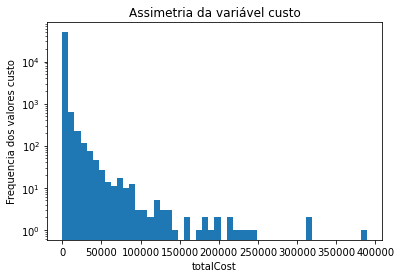

In [10]:
# verificando a frequencia dos valores totalCost

plt.hist(data['totalCost'], bins=50)
plt.yscale('log')

plt.xlabel('totalCost')
plt.ylabel('Frequencia dos valores custo')
plt.title('Assimetria da variável custo')

plt.show()

In [ ]:
# verificando a cardinalidade entre as varíaveis e desbalanceamento

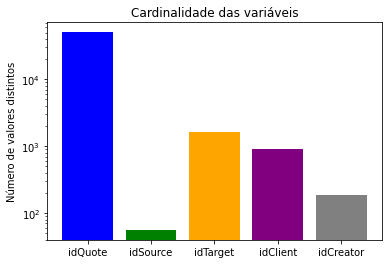

In [11]:
import matplotlib.pyplot as plt

# Cria um dicionário com o nome das variáveis e o número de valores distintos
vars_dict = {'idQuote': len(set(data.idQuote)),
             'idSource': len(set(data.idSource)),
             'idTarget': len(set(data.idTarget)),
             'idClient': len(set(data.idClient)),
             'idCreator': len(set(data.idCreator))}

# Define uma lista de cores
colors = ['blue', 'green', 'orange', 'purple', 'gray']
# blue', 'green', 'red', 'yellow', 'orange', 'purple', 'pink', 'gray', 'brown', 'black' e 'white'

# Cria um gráfico de barras com cores diferentes
plt.bar(range(len(vars_dict)), list(vars_dict.values()), align='center', color=colors)
plt.yscale('log')
plt.xticks(range(len(vars_dict)), list(vars_dict.keys()))
plt.ylabel('Número de valores distintos')
plt.title('Cardinalidade das variáveis')
plt.show()


In [ ]:
# verificando a frequencia de APPROVED (eventos = 1) x NOT NOT APPROVED (não eventos = 0)

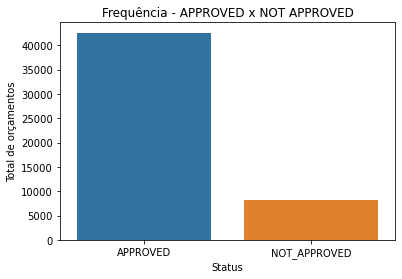

In [12]:
sns.countplot(x='status', data=data, label='totalCost por status')

#labels
plt.title('Frequência - APPROVED x NOT APPROVED')
plt.xlabel('Status')
plt.ylabel('Total de orçamentos')

plt.show()

In [14]:
# Quais informações temos na nossa coluna de status?
data.status.value_counts()

APPROVED        42547
NOT_APPROVED     8269
Name: status, dtype: int64

Text(0.5, 1.0, 'Frequencia Custo x Status')

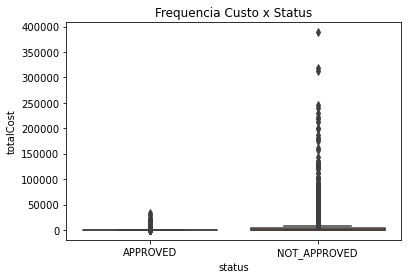

In [15]:
sns.boxplot(x='status', y='totalCost', data=data)
plt.title('Frequencia Custo x Status')

#### Iniciando o tratamento dos dados
- transformando status e idCurrency em dummies
- excluindo features idQuote (sem significancia, visto que são o id de cada orçamento)
- creationDate (sem significancia, visto que são timestamps)
- idSource (devido a alta correlação com idCurrency)
- transformando as features idTarget', 'idClient', 'idCreator' em dummy

In [16]:
data.head(2)

,idQuote,idCurrency,idSource,idTarget,creationDate,status,totalCost,idClient,idCreator
0,B-22273-81211,USD,LS1,LT1,1664577211063,APPROVED,3.2130,CLI1,CRE1
1,B-22273-81108,USD,LS1,LT2,1664577108483,APPROVED,7.8624,CLI1,CRE1


In [17]:
data['Status'] = (data['status'] == 'APPROVED').astype(int)
data['currency_usd'] = (data['idCurrency'] == 'USD').astype(int)

data = data.drop(['status', 'idCurrency', 'idQuote', 'creationDate', 'idSource'],axis=1)

In [18]:
data.tail()

,idTarget,totalCost,idClient,idCreator,Status,currency_usd
50811,LT168,897.45,CLI3,CRE1,0,1
50812,LT14,374.04,CLI50,CRE22,1,0
50813,LT14,314.50,CLI50,CRE1,0,0
50814,LT1767,848.20,CLI535,CRE1,0,1
50815,LT1757,755.78,CLI94,CRE1,0,1


In [19]:
data_dummies = pd.get_dummies(data, columns=['idTarget', 'idClient', 'idCreator'])

In [20]:
data_dummies.tail()
# data_dummies.shape

,totalCost,Status,currency_usd,idTarget_LT1,idTarget_LT10,idTarget_LT100,idTarget_LT1000,idTarget_LT1001,idTarget_LT1002,idTarget_LT1003,...,idCreator_CRE90,idCreator_CRE91,idCreator_CRE92,idCreator_CRE93,idCreator_CRE94,idCreator_CRE95,idCreator_CRE96,idCreator_CRE97,idCreator_CRE98,idCreator_CRE99
50811,897.45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50812,374.04,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50813,314.50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50814,848.20,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50815,755.78,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Realizando a seleção das melhores Features através dos algortimos:
- DecisionTreeClassifier
- RandomForestClassifier
- GradientBoostingClassifier

In [21]:
# Dividindo a base de dados em X e y

X = data_dummies.drop('Status', axis = 1).values
y = data_dummies['Status']

y = y.astype(int)

print(X.shape)
print(y.shape)

(50816, 2715)
(50816,)


In [22]:
# Executando o estimador DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [23]:
# Executando o Feature Importance

fi_col = []
fi = []

for i,column in enumerate(data_dummies.drop('Status', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
    
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df

The feature importance for totalCost is : 0.34640462640560604
The feature importance for currency_usd is : 0.21951249677272763
The feature importance for idTarget_LT1 is : 0.0
The feature importance for idTarget_LT10 is : 0.0
The feature importance for idTarget_LT100 is : 0.0
The feature importance for idTarget_LT1000 is : 0.0
The feature importance for idTarget_LT1001 is : 0.0
The feature importance for idTarget_LT1002 is : 0.0
The feature importance for idTarget_LT1003 is : 0.0
The feature importance for idTarget_LT1004 is : 0.0
The feature importance for idTarget_LT1005 is : 0.0
The feature importance for idTarget_LT1006 is : 0.0
The feature importance for idTarget_LT1007 is : 0.0
The feature importance for idTarget_LT1008 is : 0.0
The feature importance for idTarget_LT1009 is : 0.0
The feature importance for idTarget_LT101 is : 0.0
The feature importance for idTarget_LT1010 is : 0.0
The feature importance for idTarget_LT1011 is : 0.0
The feature importance for idTarget_LT1012 is : 

The feature importance for idTarget_LT392 is : 0.0
The feature importance for idTarget_LT393 is : 0.0
The feature importance for idTarget_LT394 is : 0.0
The feature importance for idTarget_LT395 is : 0.0
The feature importance for idTarget_LT396 is : 0.0
The feature importance for idTarget_LT397 is : 0.0
The feature importance for idTarget_LT398 is : 0.0
The feature importance for idTarget_LT399 is : 0.0
The feature importance for idTarget_LT4 is : 0.0
The feature importance for idTarget_LT40 is : 0.0
The feature importance for idTarget_LT400 is : 0.0
The feature importance for idTarget_LT401 is : 0.0
The feature importance for idTarget_LT402 is : 0.0
The feature importance for idTarget_LT403 is : 0.0
The feature importance for idTarget_LT404 is : 0.0
The feature importance for idTarget_LT405 is : 0.0
The feature importance for idTarget_LT406 is : 0.0
The feature importance for idTarget_LT407 is : 0.0
The feature importance for idTarget_LT408 is : 0.0
The feature importance for idTarge

The feature importance for idClient_CLI270 is : 0.0
The feature importance for idClient_CLI271 is : 0.0
The feature importance for idClient_CLI272 is : 0.0
The feature importance for idClient_CLI273 is : 0.0
The feature importance for idClient_CLI274 is : 0.0
The feature importance for idClient_CLI275 is : 0.0
The feature importance for idClient_CLI276 is : 0.0
The feature importance for idClient_CLI277 is : 0.0
The feature importance for idClient_CLI278 is : 0.0
The feature importance for idClient_CLI279 is : 0.0
The feature importance for idClient_CLI28 is : 0.0
The feature importance for idClient_CLI280 is : 0.0
The feature importance for idClient_CLI281 is : 0.0
The feature importance for idClient_CLI282 is : 0.0
The feature importance for idClient_CLI283 is : 0.0
The feature importance for idClient_CLI284 is : 0.0
The feature importance for idClient_CLI285 is : 0.0
The feature importance for idClient_CLI286 is : 0.0
The feature importance for idClient_CLI287 is : 0.0
The feature i

,Feature,Feature Importance
0,totalCost,0.346405
1,currency_usd,0.219512
2,idTarget_LT1,0.000000
3,idTarget_LT10,0.000000
4,idTarget_LT100,0.000000
...,...,...
2710,idCreator_CRE95,0.000000
2711,idCreator_CRE96,0.000000
2712,idCreator_CRE97,0.000000
2713,idCreator_CRE98,0.000000


In [24]:
# Ordenando por 20 features mais importantes

fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Criando as colunas
columns_to_keep = fi_df['Feature'][0:40]

fi_df.head(20)

,index,Feature,Feature Importance
0,0,totalCost,0.346405
1,1,currency_usd,0.219512
2,1626,idClient_CLI1,0.091381
3,2529,idCreator_CRE1,0.071337
4,1704,idClient_CLI17,0.041010
5,2704,idCreator_CRE9,0.038381
6,2148,idClient_CLI57,0.035391
7,1715,idClient_CLI18,0.033560
8,1815,idClient_CLI27,0.029316
9,2682,idCreator_CRE7,0.029244


In [25]:
# Executando o estimador RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

X = data_dummies.drop('Status', axis = 1)
y = data_dummies.Status

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_

for i, f in enumerate(X.columns):
    print("%d. %s (%f)" % (i + 1, f, importances[i]))

1. totalCost (0.388736)
2. currency_usd (0.101364)
3. idTarget_LT1 (0.000209)
4. idTarget_LT10 (0.000094)
5. idTarget_LT100 (0.000096)
6. idTarget_LT1000 (0.000000)
7. idTarget_LT1001 (0.000008)
8. idTarget_LT1002 (0.000002)
9. idTarget_LT1003 (0.000022)
10. idTarget_LT1004 (0.000000)
11. idTarget_LT1005 (0.000065)
12. idTarget_LT1006 (0.000002)
13. idTarget_LT1007 (0.000085)
14. idTarget_LT1008 (0.000031)
15. idTarget_LT1009 (0.000037)
16. idTarget_LT101 (0.000000)
17. idTarget_LT1010 (0.000000)
18. idTarget_LT1011 (0.000000)
19. idTarget_LT1012 (0.000009)
20. idTarget_LT1013 (0.000032)
21. idTarget_LT1014 (0.000000)
22. idTarget_LT1015 (0.000033)
23. idTarget_LT1016 (0.000000)
24. idTarget_LT1018 (0.000003)
25. idTarget_LT1019 (0.000000)
26. idTarget_LT102 (0.000000)
27. idTarget_LT1021 (0.000008)
28. idTarget_LT1023 (0.000001)
29. idTarget_LT1025 (0.000000)
30. idTarget_LT1026 (0.000003)
31. idTarget_LT1027 (0.000000)
32. idTarget_LT1028 (0.000020)
33. idTarget_LT1029 (0.000051)
34.

1998. idClient_CLI433 (0.000007)
1999. idClient_CLI434 (0.000003)
2000. idClient_CLI435 (0.000004)
2001. idClient_CLI436 (0.000006)
2002. idClient_CLI437 (0.000000)
2003. idClient_CLI438 (0.000007)
2004. idClient_CLI439 (0.000005)
2005. idClient_CLI44 (0.007504)
2006. idClient_CLI440 (0.000002)
2007. idClient_CLI441 (0.000033)
2008. idClient_CLI442 (0.000007)
2009. idClient_CLI443 (0.000008)
2010. idClient_CLI444 (0.000690)
2011. idClient_CLI445 (0.000013)
2012. idClient_CLI446 (0.000022)
2013. idClient_CLI447 (0.000045)
2014. idClient_CLI448 (0.000009)
2015. idClient_CLI449 (0.000028)
2016. idClient_CLI45 (0.000707)
2017. idClient_CLI450 (0.000048)
2018. idClient_CLI451 (0.000336)
2019. idClient_CLI452 (0.000007)
2020. idClient_CLI453 (0.000007)
2021. idClient_CLI454 (0.000072)
2022. idClient_CLI455 (0.000258)
2023. idClient_CLI456 (0.000092)
2024. idClient_CLI457 (0.000068)
2025. idClient_CLI458 (0.000002)
2026. idClient_CLI459 (0.000263)
2027. idClient_CLI46 (0.002529)
2028. idClien

In [26]:
# Criando a lista de tuplas com as features e suas importâncias
importance_list = [(X.columns[i], importances[i]) for i in range(len(X.columns))]

# Ordenando a lista em ordem decrescente de importância
importance_list = sorted(importance_list, key=lambda x: x[1], reverse=True)

# Criando um DataFrame a partir da lista
df_importance = pd.DataFrame(importance_list, columns=['Feature', 'Importance'])

# Mostrando as melhores 20 features ordenada da mais importante
df_importance.head(20)

,Feature,Importance
0,totalCost,0.388736
1,currency_usd,0.101364
2,idCreator_CRE1,0.033556
3,idClient_CLI1,0.029396
4,idClient_CLI57,0.026112
5,idTarget_LT65,0.021684
6,idClient_CLI17,0.021601
7,idClient_CLI27,0.017029
8,idCreator_CRE7,0.015022
9,idClient_CLI7,0.014084


In [27]:
#criando uma lista com as 20 features mais importantes
from sklearn.ensemble import RandomForestClassifier

X = data_dummies.drop('Status', axis=1)
y = data_dummies.Status

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)

# ordena as características pela importância
sorted_importances = importances.sort_values(ascending=False)

# seleciona as 50 características com as maiores importâncias
top_features = sorted_importances.index[:20].tolist()

print("lista com as 20 features mais importantes:")
print(", ".join([f"'{f}'" for f in top_features]))

lista com as 20 features mais importantes:
'totalCost', 'currency_usd', 'idCreator_CRE1', 'idClient_CLI1', 'idClient_CLI57', 'idTarget_LT65', 'idClient_CLI17', 'idClient_CLI27', 'idCreator_CRE9', 'idCreator_CRE7', 'idClient_CLI50', 'idClient_CLI7', 'idClient_CLI94', 'idCreator_CRE59', 'idClient_CLI18', 'idClient_CLI44', 'idTarget_LT146', 'idClient_CLI96', 'idClient_CLI20', 'idTarget_LT14'


In [28]:
# Executando o estimador GradientBoostingClassifier e gerando a lista com as 20 melhores features

from sklearn.ensemble import GradientBoostingClassifier

# Treinando o modelo
modelGBC = GradientBoostingClassifier()
modelGBC.fit(X, y)

# Criando a lista de tuplas com as features e suas importâncias
importance_list = [(X.columns[i], modelGBC.feature_importances_[i]) for i in range(len(X.columns))]

# Ordenando a lista em ordem decrescente de importância
importance_list = sorted(importance_list, key=lambda x: x[1], reverse=True)

# Criando um DataFrame a partir da lista
df_importance = pd.DataFrame(importance_list, columns=['Feature', 'Importance'])

# Mostrando as 20 melhores features primeiro
df_importance.head(20)

,Feature,Importance
0,totalCost,0.498676
1,currency_usd,0.214521
2,idClient_CLI57,0.045935
3,idClient_CLI17,0.041434
4,idCreator_CRE1,0.034021
5,idClient_CLI27,0.029539
6,idCreator_CRE9,0.028921
7,idCreator_CRE7,0.022555
8,idClient_CLI50,0.021956
9,idClient_CLI18,0.016012


#### gerando a lista com as melhores 20 features para cada algortimo

In [29]:
s_DecisionTree = 'totalCost, currency_usd, idClient_CLI1, idCreator_CRE, 1idClient_CLI17, idCreator_CRE9, idClient_CLI57, idClient_CLI18, idClient_CLI27, idCreator_CRE7, idClient_CLI50, idClient_CLI94, idCreator_CRE59, idClient_CLI7, idClient_CLI20, idCreator_CRE86, idTarget_LT9, idTarget_LT1809, idCreator_CRE184, idClient_CLI81'
valuesDecisionTree = [f'{x.strip()}' for x in s_DecisionTree.split(',')]

s_RandomForest = 'totalCost, currency_usd, idCreator_CRE1, idClient_CLI1, idClient_CLI57, idClient_CLI17, idTarget_LT65, idClient_CLI27, idCreator_CRE7, idClient_CLI7, idCreator_CRE9, idClient_CLI50, idClient_CLI18, idClient_CLI20, idCreator_CRE59, idClient_CLI44, idClient_CLI94, idTarget_LT14, idClient_CLI96, idTarget_LT146'
valuesRandomForest = [f'{x.strip()}' for x in s_RandomForest.split(',')]

s_GradientBoosting = 'totalCost, currency_usd, idClient_CLI57, idClient_CLI17, idCreator_CRE1, idClient_CLI27, idCreator_CRE9, idCreator_CRE7, idClient_CLI50, idClient_CLI18, idClient_CLI7, idClient_CLI94, idCreator_CRE59, idClient_CLI1, idClient_CLI20, idClient_CLI46, idTarget_LT1809, idClient_CLI134, idClient_CLI16, idCreator_CRE86'
valuesGradientBoosting = [f'{x.strip()}' for x in s_GradientBoosting.split(',')]

print('DecisionTree:',valuesDecisionTree)
print()
print('RandomForest:',valuesRandomForest)
print()
print('GradientBoosting:',valuesGradientBoosting)

DecisionTree: ['totalCost', 'currency_usd', 'idClient_CLI1', 'idCreator_CRE', '1idClient_CLI17', 'idCreator_CRE9', 'idClient_CLI57', 'idClient_CLI18', 'idClient_CLI27', 'idCreator_CRE7', 'idClient_CLI50', 'idClient_CLI94', 'idCreator_CRE59', 'idClient_CLI7', 'idClient_CLI20', 'idCreator_CRE86', 'idTarget_LT9', 'idTarget_LT1809', 'idCreator_CRE184', 'idClient_CLI81']

RandomForest: ['totalCost', 'currency_usd', 'idCreator_CRE1', 'idClient_CLI1', 'idClient_CLI57', 'idClient_CLI17', 'idTarget_LT65', 'idClient_CLI27', 'idCreator_CRE7', 'idClient_CLI7', 'idCreator_CRE9', 'idClient_CLI50', 'idClient_CLI18', 'idClient_CLI20', 'idCreator_CRE59', 'idClient_CLI44', 'idClient_CLI94', 'idTarget_LT14', 'idClient_CLI96', 'idTarget_LT146']

GradientBoosting: ['totalCost', 'currency_usd', 'idClient_CLI57', 'idClient_CLI17', 'idCreator_CRE1', 'idClient_CLI27', 'idCreator_CRE9', 'idCreator_CRE7', 'idClient_CLI50', 'idClient_CLI18', 'idClient_CLI7', 'idClient_CLI94', 'idCreator_CRE59', 'idClient_CLI1', '

#### carregando o dataframe data_dummies2 com as features mais importantes em cada algoritmo

In [40]:
# Carregando as colunas desejadas no dataframe data_dummies2

# melhores features - DecisionTree
# data_dummies2 = pd.DataFrame(data_dummies[['Status', 'totalCost', 'currency_usd', 'idClient_CLI1', 'idClient_CLI17', 'idClient_CLI57', 'idClient_CLI18', 'idCreator_CRE7', 'idClient_CLI50', 'idCreator_CRE59', 'idClient_CLI7', 'idClient_CLI20', 'idCreator_CRE86', 'idTarget_LT9', 'idTarget_LT1809', 'idCreator_CRE184', 'idClient_CLI14']])
# Log-Likelihood: -12351. / Pseudo R-squ: 0.4528

# melhores features - RandomForest
# data_dummies2 = pd.DataFrame(data_dummies[['Status', 'totalCost', 'currency_usd', 'idCreator_CRE1', 'idClient_CLI1', 'idClient_CLI57', 'idClient_CLI17', 'idTarget_LT65', 'idClient_CLI27', 'idCreator_CRE7', 'idClient_CLI7', 'idCreator_CRE9', 'idClient_CLI50', 'idCreator_CRE59', 'idClient_CLI96', 'idClient_CLI70', 'idClient_CLI47', 'idClient_CLI174', 'idClient_CLI22']])
# Log-Likelihood: -10726. / Pseudo R-squ: 0.5248

# melhores features - GradientBoosting
# data_dummies2 = pd.DataFrame(data_dummies[['Status',  'totalCost', 'currency_usd', 'idClient_CLI57', 'idClient_CLI17', 'idCreator_CRE1', 'idCreator_CRE7', 'idClient_CLI50', 'idClient_CLI18', 'idClient_CLI7', 'idClient_CLI94', 'idCreator_CRE59', 'idClient_CLI20', 'idClient_CLI46', 'idTarget_LT1809', 'idClient_CLI134']])
# Log-Likelihood: -11679. / Pseudo R-squ: 0.4825

# melhores features com stepwise
data_dummies2 = pd.DataFrame(data_dummies2[['Status', 'totalCost', 'currency_usd', 'idCreator_CRE1', 'idClient_CLI1', 'idClient_CLI57', 'idClient_CLI17', 'idTarget_LT65', 'idCreator_CRE7', 'idClient_CLI7', 'idClient_CLI50', 'idCreator_CRE59', 'idClient_CLI96', 'idClient_CLI70', 'idClient_CLI174']])

In [31]:
data_dummies2.head(2)

,Status,totalCost,currency_usd,idCreator_CRE1,idClient_CLI1,idClient_CLI57,idClient_CLI17,idTarget_LT65,idClient_CLI27,idCreator_CRE7,idClient_CLI7,idCreator_CRE9,idClient_CLI50,idCreator_CRE59,idClient_CLI96,idClient_CLI70,idClient_CLI47,idClient_CLI174,idClient_CLI22
0,1,3.2130,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,7.8624,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Verificando o log estatistico para para as melhores features em cada algoritmo

#### interpretação do logfile - estatistica

**Pseudo R-squared**: É uma medida de ajuste do modelo que varia de 0 a 1. Esse valor indica a proporção da variação na variável dependente que é explicada pelo modelo. No caso apresentado, o valor é de 0.5248, o que significa que o modelo explica cerca de 52,48% da variação na variável dependente.

**Log-Likelihood**: É uma medida de adequação do modelo, que compara a probabilidade prevista pelo modelo com a probabilidade observada nos dados. Quanto maior o valor do log-likelihood, melhor o modelo se ajusta aos dados. No caso apresentado, o valor do log-likelihood é de -10726, o que indica que o modelo se ajusta bem aos dados.

**LL-Null**: É o log-likelihood do modelo nulo, ou seja, o modelo que não inclui nenhuma variável explicativa, apenas a interceptação. Essa métrica serve como referência para avaliar o desempenho do modelo com as variáveis explicativas incluídas. No caso apresentado, o valor do LL-Null é de -22570.

**LLR p-value**: É o valor de p da estatística de teste da razão de verossimilhança (LLR), que compara a adequação do modelo completo com o modelo nulo. Se o valor de p for menor do que o nível de significância escolhido (geralmente 0,05), então é possível rejeitar a hipótese nula de que o modelo nulo é tão bom quanto o modelo completo. No caso apresentado, o valor de p é de 0,000, o que indica que o modelo completo é significativamente melhor do que o modelo nulo.

Essas colunas são os resultados da regressão logística:

**coef**: é o coeficiente estimado para cada variável independente. Indica a mudança na log-odds do resultado para cada unidade de mudança na variável, mantendo todas as outras variáveis constantes.

**std err**: é o erro padrão do coeficiente estimado. Indica a precisão da estimativa do coeficiente.

**z**: é o valor z da estatística de teste para o coeficiente estimado. É calculado dividindo o coeficiente estimado pelo seu erro padrão. Testa se o coeficiente é significativamente diferente de zero.

**P>|z|**: é o valor p da estatística de teste para o coeficiente estimado. É a probabilidade de obter um valor z tão extremo quanto o observado, assumindo que o coeficiente é realmente igual a zero. Um valor p baixo (geralmente <0,05) indica que o coeficiente é estatisticamente significativo.

**[0.025 0.975]**: são os intervalos de confiança de 95% para o coeficiente estimado. Indica o intervalo em que a estimativa do coeficiente provavelmente estará contido, com 95% de confiança. O intervalo é calculado como coeficiente estimado ± (1,96 x erro padrão).

In [41]:
### exemplo de como rodar a estatitica de um modelo regLog

import statsmodels.api as sm
import numpy as np

X = data_dummies2.drop('Status', axis = 1)
y = data_dummies2.Status

# Ajustando um modelo de regressão logística
modelo1 = sm.Logit(y, sm.add_constant(X)).fit(maxiter=200000)

# Imprimindo um resumo do modelo, incaluindo as estatísticas relevantes
print(modelo1.summary())

Optimization terminated successfully.
         Current function value: 0.211067
         Iterations 1208
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                50816
Model:                          Logit   Df Residuals:                    50797
Method:                           MLE   Df Model:                           18
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                  0.5248
Time:                        12:52:33   Log-Likelihood:                -10726.
converged:                       True   LL-Null:                       -22570.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1145      0.040     -2.885      0.004      -0.192      -0.037
totalCost  

#### Verificando o BIC e AIC para cada algoritmo

**RandomForest** 
 Log-likelihood: -10725.592725688446
 AIC: 21489.185451376892
 BIC: 21657.068815724422
    
**DecisionTree**
 Log-likelihood: -12351.113084741804
 AIC: 24736.22616948361
 BIC: 24886.437600741923
    
**GradientBoosting**
 Log-likelihood: -11679.4846773171
 AIC: 23390.9693546342
 BIC: 23532.34481934791

In [8]:
## Verificando o BIC e AIC para cada algoritmo

# Adicione uma coluna de 1's para o intercepto
X = sm.add_constant(X)

# Crie o modelo de Regressão Logística
model = sm.Logit(y, X)
# model = LinearSVC(loss='squared_hinge')

# Ajuste o modelo
result = model.fit(maxiter=1000)
# result = model.fit(X, y)

# Obtenha as métricas Log-likelihood, AIC e BIC
loglik = result.llf
aic = result.aic
bic = result.bic

print("Log-likelihood:", loglik)
print("AIC:", aic)
print("BIC:", bic)

         Current function value: 0.211067
         Iterations: 1000
Log-likelihood: -10725.592725688446
AIC: 21489.185451376892
BIC: 21657.068815724422


#### Aplicando o stepwise com o dataframe contendo as melhores features do modelo RandomForest

In [ ]:
# pip install stepwise_process

In [34]:
# Estimação do modelo por meio do procedimento Stepwise

# melhores features - RandomForest
modelo1_step = pd.DataFrame(data_dummies2[['Status', 'totalCost', 'currency_usd', 'idCreator_CRE1', 'idClient_CLI1', 'idClient_CLI57', 'idClient_CLI17', 'idTarget_LT65', 'idClient_CLI27', 'idCreator_CRE7', 'idClient_CLI7', 'idCreator_CRE9', 'idClient_CLI50', 'idCreator_CRE59', 'idClient_CLI96', 'idClient_CLI70', 'idClient_CLI47', 'idClient_CLI174', 'idClient_CLI22']])

X = modelo1_step.drop('Status', axis = 1)
y = modelo1_step.Status

from stepwise_process.statsmodels import stepwise

modelo1_step = stepwise(modelo1, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 Status ~ totalCost + currency_usd + idCreator_CRE1 + idClient_CLI1 + idClient_CLI57 + idClient_CLI17 + idTarget_LT65 + idClient_CLI27 + idCreator_CRE7 + idClient_CLI7 + idCreator_CRE9 + idClient_CLI50 + idCreator_CRE59 + idClient_CLI96 + idClient_CLI70 + idClient_CLI47 + idClient_CLI174 + idClient_CLI22
         Current function value: 0.211067
         Iterations: 35

 Discarding atribute "idCreator_CRE9" with p-value equal to 0.9929349010215119 

Estimating model...: 
 Status ~ totalCost + currency_usd + idCreator_CRE1 + idClient_CLI1 + idClient_CLI57 + idClient_CLI17 + idTarget_LT65 + idClient_CLI27 + idCreator_CRE7 + idClient_CLI7 + idClient_CLI50 + idCreator_CRE59 + idClient_CLI96 + idClient_CLI70 + idClient_CLI47 + idClient_CLI174 + idClient_CLI22
         Current function value: 0.213763
         Iterations: 35

 Discarding atribute "idClient_CLI27" with p-value equal to 0.9735860719167109 

Estimating model...: 
 Status ~ totalCos

In [39]:
# Adicione uma coluna de 1's para o intercepto
X = sm.add_constant(X)

# Crie o modelo de Regressão Logística
model = sm.Logit(y, X)
# model = LinearSVC(loss='squared_hinge')

# Ajuste o modelo
result = model.fit(maxiter=1000)
# result = model.fit(X, y)

# Obtenha as métricas Log-likelihood, AIC e BIC
loglik = result.llf
aic = result.aic
bic = result.bic

print("Log-likelihood:", loglik)
print("AIC:", aic)
print("BIC:", bic)

Optimization terminated successfully.
         Current function value: 0.226377
         Iterations 11
Log-likelihood: -11503.571995021808
AIC: 23037.143990043616
BIC: 23169.68348821272


#### features a serem excluídas pelo método stepwise
{'atribute': 'idCreator_CRE9', 'p-value': 0.9929349010215119}
{'atribute': 'idClient_CLI27', 'p-value': 0.9735860719167109}
{'atribute': 'idClient_CLI47', 'p-value': 0.9422870089667222}
{'atribute': 'idClient_CLI22', 'p-value': 0.39583218258248587}

>**RandomForest** (features) Log-likelihood: -10725.592725688446 AIC: 21489.185451376892 BIC: 21657.068815724422

>**stepwise (features)** Log-likelihood: -11503.571995021808 AIC: 23037.143990043616 BIC: 23169.68348821272

### Aplicando a reg Log. na base de dados com as melhores features do algoritmo RandomForest
**Obs**. a base de dados com melhores features do stepwise foi ignorada, visto que teve um pior logLik, AIC e BIC na comparação.

In [42]:
# separando dados e classes e preparando os dados para treino

data_dummies2 = pd.DataFrame(data_dummies[['Status', 'totalCost', 'currency_usd', 'idCreator_CRE1', 'idClient_CLI1', 'idClient_CLI57', 'idClient_CLI17', 'idTarget_LT65', 'idClient_CLI27', 'idCreator_CRE7', 'idClient_CLI7', 'idCreator_CRE9', 'idClient_CLI50', 'idCreator_CRE59', 'idClient_CLI96', 'idClient_CLI70', 'idClient_CLI47', 'idClient_CLI174', 'idClient_CLI22']])

X = data_dummies2.drop('Status', axis = 1)
y = data_dummies2.Status

In [43]:
# separando dados de treino e teste na base desbalanceada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=1, stratify=y)

In [44]:
# Importando os algoritmos e criando os classificadores
from sklearn.linear_model import LogisticRegression
clfLog = LogisticRegression(random_state=0,max_iter=50000)

In [45]:
# Fazendo o fit do modelo com base desbalanceada
clfLog = clfLog.fit(X_treino, y_treino)

In [46]:
# Fazendo a predicão do modelo com base desbalanceada

## df_Model01 ##
predLog = clfLog.predict(X_teste)

In [120]:
# relatorio de classificação / observando o Recall
from sklearn.metrics import confusion_matrix, classification_report

print (classification_report(y_teste,predLog))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2067
           1       0.95      0.95      0.95     10637

    accuracy                           0.92     12704
   macro avg       0.86      0.86      0.86     12704
weighted avg       0.92      0.92      0.92     12704



- A precisão (**precision**) é a proporção de verdadeiros positivos (eventos identificados corretamente) em relação a todos os eventos identificados pelo modelo (verdadeiros positivos + falsos positivos). 

- O **recall** é a proporção de verdadeiros positivos em relação a todos os eventos reais (verdadeiros positivos + falsos negativos). 

- O **F1-score** é a média harmônica da precisão e recall, fornecendo uma medida única de desempenho do modelo. Nesse caso, o F1-score para os "não eventos" é de 0.76, o que indica um bom desempenho do modelo em **identificar corretamente os "não eventos"**.

- A acurácia (**accuracy**) é a proporção de predições corretas do modelo em relação ao total de predições. 
> Nesse caso, a acurácia geral do modelo é de 0.92, o que significa que o modelo acertou em 92% das predições, considerando tanto os "não eventos" quanto os "eventos".

- A macro-avaliação (**macro avg**) é a média não ponderada das métricas de precisão, recall e F1-score. 
> Nesse caso, a macro-avaliação para os "não eventos" é de 0.86, o que indica um bom desempenho do modelo.

- A avaliação ponderada (**weighted avg**) é a média ponderada das métricas de precisão, recall e F1-score, levando em consideração o suporte de cada classe (quantidade de amostras em cada classe). 
> Nesse caso, a avaliação ponderada para os "não eventos" é de 0.92, o que indica um bom desempenho do modelo em identificar corretamente os "não eventos" em relação ao total de amostras.

In [121]:
#imprimindo a matriz de confusão

print (pd.crosstab(y_teste,predLog, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0      1    All
Real                       
0        1566    501   2067
1         489  10148  10637
All      2055  10649  12704


In [123]:
# from sklearn.metrics import confusion_matrix

# # faça previsões para toda a base de dados
# y_pred = modelo.predict(X)

# # crie a matriz de confusão
# conf_mat = confusion_matrix(y, y_pred)

# # exiba a matriz de confusão
# print (pd.crosstab(y, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

#### aumentando o cutoff para 0.7

In [18]:
predProbLog = clfLog.predict_proba(X_teste)[:, 1]  # Probabilidade da classe positiva (1)
predLog = (predProbLog > 0.7).astype(int)  # Previsão usando cutoff de 70%

In [19]:
# relatorio de classificação / observando o Recall
from sklearn.metrics import confusion_matrix, classification_report

print (classification_report(y_teste,predLog))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      2067
           1       0.96      0.95      0.95     10637

    accuracy                           0.92     12704
   macro avg       0.85      0.86      0.86     12704
weighted avg       0.92      0.92      0.92     12704



In [20]:
#imprimindo a matriz de confusão

print (pd.crosstab(y_teste,predLog, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0      1    All
Real                       
0        1592    475   2067
1         536  10101  10637
All      2128  10576  12704


#### Visualizando a área sob a curva ROC + coef. GINI

Área sob a curva ROC: 0.847
Coeficiente de Gini: 0.6930409999618405


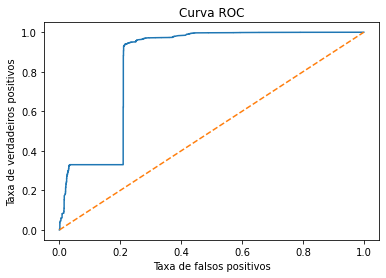

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# ajusta um modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_treino, y_treino)

# calcula a área sob a curva ROC
roc_auc = roc_auc_score(y_teste, modelo.predict_proba(X_teste)[:,1])
print(f'Área sob a curva ROC: {roc_auc:.3f}')

# calcula o coeficiente de Gini
gini = 2 * roc_auc_score(y_teste, modelo.predict_proba(X_teste)[:,1]) - 1
print(f'Coeficiente de Gini: {gini}')

# calcula a curva ROC e plota o gráfico
fpr, tpr, thresholds = roc_curve(y_teste, modelo.predict_proba(X_teste)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Curva ROC')
plt.show()

- A **área sob a curva ROC** (Receiver Operating Characteristic) é uma medida comum de avaliação da performance de um modelo de classificação binária. Esta métrica avalia a capacidade do modelo em distinguir entre as duas classes, "eventos" e "não eventos". A área sob a curva ROC é um valor numérico que varia entre 0 e 1, sendo que valores mais próximos de 1 indicam uma melhor capacidade do modelo em distinguir entre as duas classes.

> No caso apresentado, a área sob a curva ROC é de **0.847, o que sugere que o modelo teve um bom desempenho na identificação das duas classes.

- Outra medida comum para avaliação de modelos de classificação binária é o **coeficiente de Gini**, que também varia de 0 a 1 e é calculado a partir da área sob a curva ROC. O coeficiente de Gini é uma medida de desigualdade, que avalia a proporção da área entre a curva ROC e a linha de referência, que corresponde à linha diagonal do gráfico. Valores mais próximos de 1 indicam um melhor desempenho do modelo.

> No caso apresentado, o **coeficiente de Gini é de 0.6930, o que indica que o modelo teve um desempenho bom na identificação das duas classes, com um nível de desigualdade bastante baixo.

É importante lembrar que, embora a área sob a curva ROC e o coeficiente de Gini sejam medidas importantes para avaliar a performance de um modelo de classificação binária, eles não são suficientes por si só para avaliar a performance do modelo. **Outras medidas, como a precisão, recall e F1-score, devem ser consideradas para uma avaliação completa do modelo**.

#### rodando o modelo no dataframe 2023

In [47]:
# Importando a base referente a 2023
data2023 = pd.read_excel("df_bwx_2023.xlsx")
print(data2023.shape)

(188, 9)


In [48]:
data2023['Status'] = (data2023['status'] == 'APPROVED').astype(int)
data2023['currency_usd'] = (data2023['idCurrency'] == 'USD').astype(int)

In [49]:
data2023 = data2023.drop(['status', 'idCurrency', 'idQuote', 'creationDate', 'idSource'],axis=1)

In [50]:
data2023_dummies = pd.get_dummies(data2023, columns=['idTarget', 'idClient', 'idCreator'])

In [51]:
data2023_dummies2 = pd.DataFrame(data2023_dummies[['Status', 'totalCost', 'currency_usd', 'idCreator_CRE1', 'idClient_CLI1', 'idClient_CLI57', 'idTarget_LT65', 'idClient_CLI27', 'idCreator_CRE59', 'idClient_CLI96', 'idClient_CLI70', 'idClient_CLI22']])

In [52]:
data2023_dummies2.Status.value_counts()

1    136
0     52
Name: Status, dtype: int64

In [109]:
X = data2023_dummies2.drop('Status', axis = 1)
y = data2023_dummies2.Status

# separando dados de treino e teste na base desbalanceada
X_treino2023, X_teste2023, y_treino2023, y_teste2023 = train_test_split(X, y, random_state=1, stratify=y)

In [110]:
# Importando os algoritmos e criando os classificadores
from sklearn.linear_model import LogisticRegression
clfLog2023 = LogisticRegression(random_state=0,max_iter=50000)

# Fazendo o fit do modelo com base desbalanceada
clfLog2023 = clfLog2023.fit(X_treino2023, y_treino2023)

# Fazendo a predicão do modelo com base desbalanceada
predLog2023 = clfLog2023.predict(X_teste2023)

In [111]:
# Fazendo a predicão do modelo com base desbalanceada
predLog2023 = clfLog2023.predict(X_teste2023)

In [112]:
# relatorio de classificação / observando o Recall
print (classification_report(y_teste2023,predLog2023))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.91      0.94      0.93        34

    accuracy                           0.89        47
   macro avg       0.87      0.86      0.86        47
weighted avg       0.89      0.89      0.89        47



In [113]:
#imprimindo a matriz de confusão
print (pd.crosstab(y_teste2023,predLog2023, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        10   3   13
1         2  32   34
All      12  35   47


In [114]:
from sklearn.metrics import confusion_matrix

# faça previsões para toda a base de dados
y_pred = modelo.predict(X)

# crie a matriz de confusão
conf_mat = confusion_matrix(y, y_pred)

# exiba a matriz de confusão
print (pd.crosstab(y, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0    1  All
Real                 
0        39   13   52
1         7  129  136
All      46  142  188


#### rodando o modelo no dataframe 2023  - cutoff  = 0.7 

In [49]:
predProbLog2023 = clfLog2023.predict_proba(X_teste2023)[:, 1]  # Probabilidade da classe positiva (1)
predLog2023 = (predProbLog2023 > 0.7).astype(int)  # Previsão usando cutoff de 70%

In [50]:
# relatorio de classificação / observando o Recall
print (classification_report(y_teste2023,predLog2023))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.94      0.91      0.93        34

    accuracy                           0.89        47
   macro avg       0.86      0.88      0.87        47
weighted avg       0.90      0.89      0.89        47



In [51]:
#imprimindo a matriz de confusão
print (pd.crosstab(y_teste2023,predLog2023, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        11   2   13
1         3  31   34
All      14  33   47


In [58]:
# ajusta um modelo de regressão logística
modelo2023 = LogisticRegression()
modelo2023.fit(X_treino2023, y_treino2023)

# calcula a área sob a curva ROC
roc_auc2 = roc_auc_score(y_teste2023, modelo2023.predict_proba(X_teste2023)[:,1])
print(f'Área sob a curva ROC: {roc_auc:.3f}')

# calcula o coeficiente de Gini
gini = 2 * roc_auc_score(y_teste2023, modelo2023.predict_proba(X_teste2023)[:,1]) - 1
print(f'Coeficiente de Gini: {gini}')

# # calcula a curva ROC e plota o gráfico
# fpr2, tpr2, thresholds2 = roc_curve2(y_teste, modelo2023.predict_proba(X_teste2023)[:,1])
# # plt.plot(fpr, tpr, label='Modelo 1')
# plt.plot(fpr2, tpr2, label='Modelo 2')
# plt.plot([0, 1], [0, 1], linestyle='--')
# plt.xlabel('Taxa de falsos positivos')
# plt.ylabel('Taxa de verdadeiros positivos')
# plt.title('Curva ROC')
# plt.show()

Área sob a curva ROC: 0.847
Coeficiente de Gini: 0.8054298642533935


#### Rodando o modelo NearMiss
- igualando a classe majotitária a classe minoritária

In [53]:
# metodo de Undersampling para igualar a quantidade de amostras entre as classes
from imblearn.under_sampling import NearMiss

#  aplicando o NearMiss nos dados para igualar a qde de amostras das classes 
from imblearn.under_sampling import RandomUnderSampler 

In [54]:
under_sampler = RandomUnderSampler()

X = data_dummies2.drop('Status', axis = 1)
y = data_dummies2.Status


X_NearMiss, y_NearMiss = under_sampler.fit_resample(X, y)

# visualizando a distribuição da variável target (y)
# modelo1_step.Status.value_counts()

# separando 70% dos dados para treino e 30% para teste
## df_Model01 ##
X_treino_NearMiss, X_teste_NearMiss, y_treino_NearMiss, y_teste_NearMiss = train_test_split(X_NearMiss, 
                                                       y_NearMiss, random_state=1, stratify=y_NearMiss)

In [55]:
# Importando os algoritmos e criando os classificadores
clfLogMiss = LogisticRegression(random_state=0,max_iter=50000)

# Fazendo o fit do modelo com base desbalanceada
clfLogMiss = clfLogMiss.fit(X_treino_NearMiss, y_treino_NearMiss)

# Fazendo a predicão do modelo com base desbalanceada
predLogMiss = clfLogMiss.predict(X_teste_NearMiss)

In [62]:
# relatorio de classificação / observando o Recall
print (classification_report(y_teste_NearMiss,predLogMiss))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      2067
           1       0.81      0.93      0.86      2068

    accuracy                           0.85      4135
   macro avg       0.86      0.85      0.85      4135
weighted avg       0.86      0.85      0.85      4135



In [63]:
#imprimindo a matriz de confusão
print (pd.crosstab(y_teste_NearMiss,predLogMiss, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1611   456  2067
1         146  1922  2068
All      1757  2378  4135


#### NearMiss com cutoff = 0.7

In [64]:
predProbLogMiss = clfLogMiss.predict_proba(X_teste_NearMiss)[:, 1]  # Probabilidade da classe positiva (1)
predLogMiss = (predProbLogMiss > 0.7).astype(int)  # Previsão usando cutoff de 70%

In [65]:
# relatorio de classificação / observando o Recall
print (classification_report(y_teste_NearMiss,predLogMiss))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      2067
           1       0.81      0.91      0.86      2068

    accuracy                           0.85      4135
   macro avg       0.86      0.85      0.85      4135
weighted avg       0.86      0.85      0.85      4135



In [66]:
#imprimindo a matriz de confusão
print (pd.crosstab(y_teste_NearMiss,predLogMiss, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1636   431  2067
1         182  1886  2068
All      1818  2317  4135


#### Avaliando LogLik, AIC e BIC do modelo NearMiss

In [56]:
# Adicione uma coluna de 1's para o intercepto
X = sm.add_constant(X)

# Crie o modelo de Regressão Logística
model1 = sm.Logit(y, X)
# model = LinearSVC(loss='squared_hinge')

# Ajuste o modelo
result = model1.fit(maxiter=1000)
# result = model.fit(X, y)

# Obtenha as métricas Log-likelihood, AIC e BIC
loglik = result.llf
aic = result.aic
bic = result.bic

print("Log-likelihood:", loglik)
print("AIC:", aic)
print("BIC:", bic)

         Current function value: 0.211067
         Iterations: 1000
Log-likelihood: -10725.592725688446
AIC: 21489.185451376892
BIC: 21657.068815724422


#### NearMiss - área curva ROC + coef. GINI

Área sob a curva ROC: 0.845
Coeficiente de Gini: 0.6907676493184323


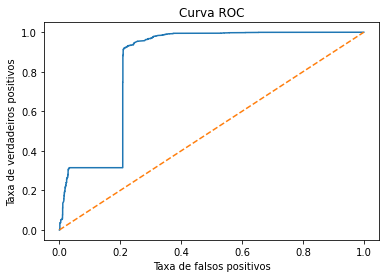

In [72]:
# ajusta um modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_treino_NearMiss, y_treino_NearMiss)

# calcula a área sob a curva ROC
roc_auc = roc_auc_score(y_teste_NearMiss, modelo.predict_proba(X_teste_NearMiss)[:,1])
print(f'Área sob a curva ROC: {roc_auc:.3f}')

# calcula o coeficiente de Gini
gini = 2 * roc_auc_score(y_teste_NearMiss, modelo.predict_proba(X_teste_NearMiss)[:,1]) - 1
print(f'Coeficiente de Gini: {gini}')

# calcula a curva ROC e plota o gráfico
fpr, tpr, thresholds = roc_curve(y_teste_NearMiss, modelo.predict_proba(X_teste_NearMiss)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Curva ROC')
plt.show()

##### NearMiss na base de dados 2023

In [73]:
under_sampler = RandomUnderSampler()

X = data2023_dummies2.drop('Status', axis = 1)
y = data2023_dummies2.Status


X_NearMiss, y_NearMiss = under_sampler.fit_resample(X, y)

# visualizando a distribuição da variável target (y)
# modelo1_step.Status.value_counts()

# separando 70% dos dados para treino e 30% para teste
## df_Model01 ##
X_treino_NearMiss, X_teste_NearMiss, y_treino_NearMiss, y_teste_NearMiss = train_test_split(X_NearMiss, 
                                                       y_NearMiss, random_state=1, stratify=y_NearMiss)

In [74]:
# Importando os algoritmos e criando os classificadores
clfLogMiss = LogisticRegression(random_state=0,max_iter=50000)
# Fazendo o fit do modelo com base desbalanceada
clfLogMiss = clfLogMiss.fit(X_treino_NearMiss, y_treino_NearMiss)
# Fazendo a predicão do modelo com base desbalanceada
predLogMiss = clfLogMiss.predict(X_teste_NearMiss)

In [75]:
# relatorio de classificação / observando o Recall
print (classification_report(y_teste_NearMiss,predLogMiss))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.86      0.92      0.89        13

    accuracy                           0.88        26
   macro avg       0.89      0.88      0.88        26
weighted avg       0.89      0.88      0.88        26



In [76]:
#imprimindo a matriz de confusão
print (pd.crosstab(y_teste_NearMiss,predLogMiss, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        11   2   13
1         1  12   13
All      12  14   26


#### NearMiss na base 2023 com cutoff = 0.7

In [77]:
predProbLogMiss = clfLogMiss.predict_proba(X_teste_NearMiss)[:, 1]  # Probabilidade da classe positiva (1)
predLogMiss = (predProbLogMiss > 0.7).astype(int)  # Previsão usando cutoff de 70%

In [78]:
# relatorio de classificação / observando o Recall
print (classification_report(y_teste_NearMiss,predLogMiss))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.80      0.62      0.70        13

    accuracy                           0.73        26
   macro avg       0.74      0.73      0.73        26
weighted avg       0.74      0.73      0.73        26



In [79]:
#imprimindo a matriz de confusão
print (pd.crosstab(y_teste_NearMiss,predLogMiss, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        11   2   13
1         5   8   13
All      16  10   26


#### NearMiss - área curva ROC + coef. GINI na base de dados 2023

Área sob a curva ROC: 0.870
Coeficiente de Gini: 0.7396449704142012


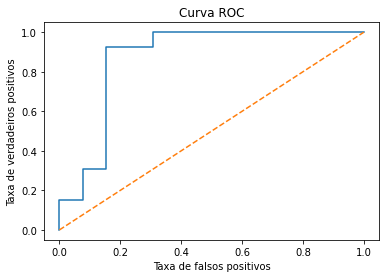

In [80]:
# ajusta um modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_treino_NearMiss, y_treino_NearMiss)

# calcula a área sob a curva ROC
roc_auc = roc_auc_score(y_teste_NearMiss, modelo.predict_proba(X_teste_NearMiss)[:,1])
print(f'Área sob a curva ROC: {roc_auc:.3f}')

# calcula o coeficiente de Gini
gini = 2 * roc_auc_score(y_teste_NearMiss, modelo.predict_proba(X_teste_NearMiss)[:,1]) - 1
print(f'Coeficiente de Gini: {gini}')

# calcula a curva ROC e plota o gráfico
fpr, tpr, thresholds = roc_curve(y_teste_NearMiss, modelo.predict_proba(X_teste_NearMiss)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Curva ROC')
plt.show()

#### Rodando o modelo SMOTE 
- igualando a classe minoritária com a classe majoritária (com dados sinteticos)

In [63]:
#separando os dados e as classes (novamente)
X_SMOTE = data_dummies2.drop('Status', axis = 1)
y_SMOTE = data_dummies2.Status
y_SMOTE.value_counts()

1    42547
0     8269
Name: Status, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [65]:
#aplicando o SMOTE nos dados
X_SMOTE, y_SMOTE = smt.fit_resample(X_SMOTE,y_SMOTE)

In [66]:
#separando 70% dos dados para treino e 30% para teste

# df_Model01
X_treino_SMOTE, X_teste_SMOTE, y_treino_SMOTE, y_teste_SMOTE = train_test_split(X_SMOTE, y_SMOTE, random_state=1, stratify=y_SMOTE)

In [67]:
# Importando os algoritmos e criando os classificadores
clfLogSmote = LogisticRegression(random_state=0,max_iter=50000)

# Fazendo o fit do modelo com base desbalanceada
clfLogSmote = clfLogSmote.fit(X_treino_SMOTE, y_treino_SMOTE)

# Fazendo a predicão do modelo com base desbalanceada
predLogSmote = clfLogSmote.predict(X_teste_SMOTE)

In [86]:
# relatorio de classificação / observando o Recall
print (classification_report(y_teste_SMOTE,predLogSmote))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     10637
           1       0.81      0.95      0.87     10637

    accuracy                           0.86     21274
   macro avg       0.87      0.86      0.86     21274
weighted avg       0.87      0.86      0.86     21274



In [87]:
#imprimindo a matriz de confusão
print (pd.crosstab(y_teste_SMOTE,predLogSmote, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0      1    All
Real                       
0        8251   2386  10637
1         583  10054  10637
All      8834  12440  21274


#### SMOTE com cutoff = 0.7

In [88]:
predProbLogSMOTE = clfLogSmote.predict_proba(X_teste_SMOTE)[:, 1]  # Probabilidade da classe positiva (1)
predLogSmote = (predProbLogSMOTE > 0.7).astype(int)  # Previsão usando cutoff de 70%

In [89]:
# relatorio de classificação / observando o Recall
print (classification_report(y_teste_SMOTE,predLogSmote))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84     10637
           1       0.81      0.93      0.87     10637

    accuracy                           0.86     21274
   macro avg       0.86      0.86      0.85     21274
weighted avg       0.86      0.86      0.85     21274



In [90]:
#imprimindo a matriz de confusão
print (pd.crosstab(y_teste_SMOTE,predLogSmote, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0      1    All
Real                       
0        8279   2358  10637
1         725   9912  10637
All      9004  12270  21274


#### SMOTE - área curva ROC + coef. GINI 

Área sob a curva ROC: 0.834
Coeficiente de Gini: 0.6670165722237478


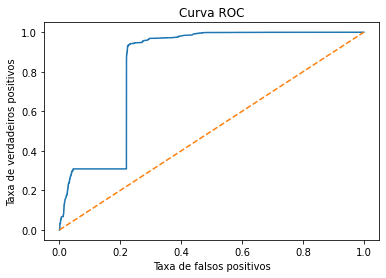

In [91]:
# ajusta um modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_treino_SMOTE, y_treino_SMOTE)

# calcula a área sob a curva ROC
roc_auc = roc_auc_score(y_teste_SMOTE, modelo.predict_proba(X_teste_SMOTE)[:,1])
print(f'Área sob a curva ROC: {roc_auc:.3f}')

# calcula o coeficiente de Gini
gini = 2 * roc_auc_score(y_teste_SMOTE, modelo.predict_proba(X_teste_SMOTE)[:,1]) - 1
print(f'Coeficiente de Gini: {gini}')

# calcula a curva ROC e plota o gráfico
fpr, tpr, thresholds = roc_curve(y_teste_SMOTE, modelo.predict_proba(X_teste_SMOTE)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Curva ROC')
plt.show()

#### Avaliando LogLik, AIC e BIC do modelo SMOTE

In [68]:
# Adicione uma coluna de 1's para o intercepto

X = X_SMOTE
y = y_SMOTE

X = sm.add_constant(X)

# Crie o modelo de Regressão Logística
model = sm.Logit(y, X)
# model = LinearSVC(loss='squared_hinge')

# Ajuste o modelo
result = model.fit(maxiter=100000)
# result = model.fit(X, y)

# Obtenha as métricas Log-likelihood, AIC e BIC
loglik = result.llf
aic = result.aic
bic = result.bic

print("Log-likelihood:", loglik)
print("AIC:", aic)
print("BIC:", bic)

         Current function value: 0.351933
         Iterations: 100000
Log-likelihood: -29947.394419849585
AIC: 59932.78883969917
BIC: 60110.46756402814


####  SMOTE na base de dados 2023

In [92]:
#separando os dados e as classes (novamente)
X_SMOTE = data2023_dummies2.drop('Status', axis = 1)
y_SMOTE = data2023_dummies2.Status
y_SMOTE.value_counts()

1    136
0     52
Name: Status, dtype: int64

In [93]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [94]:
#aplicando o SMOTE nos dados
X_SMOTE, y_SMOTE = smt.fit_resample(X_SMOTE,y_SMOTE)
print (X_SMOTE.shape)
print (y_SMOTE.shape)

(272, 11)
(272,)


In [95]:
#separando 70% dos dados para treino e 30% para teste

# df_Model01
X_treino_SMOTE, X_teste_SMOTE, y_treino_SMOTE, y_teste_SMOTE = train_test_split(X_SMOTE, y_SMOTE, random_state=1, stratify=y_SMOTE)

In [96]:
# Importando os algoritmos e criando os classificadores
clfLogSmote = LogisticRegression(random_state=0,max_iter=50000)

# Fazendo o fit do modelo com base desbalanceada
clfLogSmote = clfLogSmote.fit(X_treino_SMOTE, y_treino_SMOTE)

# Fazendo a predicão do modelo com base desbalanceada
predLogSmote = clfLogSmote.predict(X_teste_SMOTE)

In [97]:
# relatorio de classificação / observando o Recall
print (classification_report(y_teste_SMOTE,predLogSmote))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.92      1.00      0.96        34

    accuracy                           0.96        68
   macro avg       0.96      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68



In [98]:
#imprimindo a matriz de confusão
print (pd.crosstab(y_teste_SMOTE,predLogSmote, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        31   3   34
1         0  34   34
All      31  37   68


#### SMOTE com cutoff = 0.7 na base de dados 2023

In [99]:
predProbLogSMOTE = clfLogSmote.predict_proba(X_teste_SMOTE)[:, 1]  # Probabilidade da classe positiva (1)
predLogSmote = (predProbLogSMOTE > 0.7).astype(int)  # Previsão usando cutoff de 70%

In [100]:
# relatorio de classificação / observando o Recall
print (classification_report(y_teste_SMOTE,predLogSmote))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        34
           1       1.00      0.59      0.74        34

    accuracy                           0.79        68
   macro avg       0.85      0.79      0.79        68
weighted avg       0.85      0.79      0.79        68



In [101]:
#imprimindo a matriz de confusão
print (pd.crosstab(y_teste_SMOTE,predLogSmote, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        34   0   34
1        14  20   34
All      48  20   68


#### SMOTE - área curva ROC + coef. GINI na base de dados 2023

Área sob a curva ROC: 0.974
Coeficiente de Gini: 0.9472318339100347


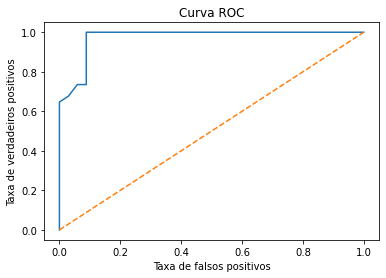

In [102]:
# ajusta um modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_treino_SMOTE, y_treino_SMOTE)

# calcula a área sob a curva ROC
roc_auc = roc_auc_score(y_teste_SMOTE, modelo.predict_proba(X_teste_SMOTE)[:,1])
print(f'Área sob a curva ROC: {roc_auc:.3f}')

# calcula o coeficiente de Gini
gini = 2 * roc_auc_score(y_teste_SMOTE, modelo.predict_proba(X_teste_SMOTE)[:,1]) - 1
print(f'Coeficiente de Gini: {gini}')

# calcula a curva ROC e plota o gráfico
fpr, tpr, thresholds = roc_curve(y_teste_SMOTE, modelo.predict_proba(X_teste_SMOTE)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Curva ROC')
plt.show()

#### comparando a ROC entre os modelos

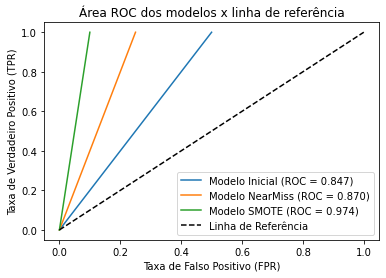

In [4]:
import matplotlib.pyplot as plt

# Taxa de verdadeiro positivo e taxa de falso positivo para vários pontos de corte em cada modelo
# Por exemplo:
modelo_inicial_tpr = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
modelo_inicial_fpr = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
modelo_nearmiss_tpr = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
modelo_nearmiss_fpr = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25]
modelo_smote_tpr = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
modelo_smote_fpr = [0.0, 0.02, 0.04, 0.06, 0.08, 0.1]

# Plotar curva ROC para cada modelo
plt.plot(modelo_inicial_fpr, modelo_inicial_tpr, label='Modelo Inicial (ROC = 0.847)')
plt.plot(modelo_nearmiss_fpr, modelo_nearmiss_tpr, label='Modelo NearMiss (ROC = 0.870)')
plt.plot(modelo_smote_fpr, modelo_smote_tpr, label='Modelo SMOTE (ROC = 0.974)')

# Plotar linha de referência
plt.plot([0, 1], [0, 1], 'k--', label='Linha de Referência')

# Adicionar legenda e rótulos dos eixos
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Área ROC dos modelos x linha de referência')
plt.legend()

# Exibir o gráfico
plt.show()


#### Rodando o modelo preditivo KNN 

In [58]:
# Importando os algoritmos e criando os classificadores

from sklearn.neighbors import KNeighborsClassifier
neigh_desbalanceado = KNeighborsClassifier(n_neighbors=3)

In [59]:
# Fazendo o fit do modelo com base desbalanceada
neigh_desbalanceado = neigh_desbalanceado.fit(X_treino, y_treino)

In [60]:
# Fazendo a predicão do modelo com base desbalanceada
pred_KNN_desbalanceado = neigh_desbalanceado.predict(X_teste)

In [61]:
# Importando as métricas de avaliação

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
# relatorio de classificação / KNN
print (classification_report(y_teste,pred_KNN_desbalanceado))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      2067
           1       0.94      0.96      0.95     10637

    accuracy                           0.92     12704
   macro avg       0.85      0.83      0.84     12704
weighted avg       0.91      0.92      0.91     12704

